In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pip install scikit-learn

In [3]:
df = pd.read_csv("recipe_final (1) (1).csv")
df

print("Shape:", df.shape)
df.head()

Shape: (48735, 14)


,Unnamed: 0,recipe_id,recipe_name,aver_rate,image_url,review_nums,calories,fat,carbohydrates,protein,cholesterol,sodium,fiber,ingredients_list
0,0,222388,Homemade Bacon,5.00,https://images.media-allrecipes.com/userphotos...,3,15,36,1,42,21,81,2,"['pork belly', 'smoked paprika', 'kosher salt'..."
1,1,240488,"Pork Loin, Apples, and Sauerkraut",4.76,https://images.media-allrecipes.com/userphotos...,29,19,18,10,73,33,104,41,"['sauerkraut drained', 'Granny Smith apples sl..."
2,2,218939,Foolproof Rosemary Chicken Wings,4.57,https://images.media-allrecipes.com/userphotos...,12,17,36,2,48,24,31,4,"['chicken wings', 'sprigs rosemary', 'head gar..."
3,3,87211,Chicken Pesto Paninis,4.62,https://images.media-allrecipes.com/userphotos...,163,32,45,20,65,20,43,18,"['focaccia bread quartered', 'prepared basil p..."
4,4,245714,Potato Bacon Pizza,4.50,https://images.media-allrecipes.com/userphotos...,2,8,12,5,14,7,8,3,"['red potatoes', 'strips bacon', 'Sauce:', 'he..."


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48735 entries, 0 to 48734
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        48735 non-null  int64  
 1   recipe_id         48735 non-null  int64  
 2   recipe_name       48735 non-null  object 
 3   aver_rate         48735 non-null  float64
 4   image_url         48735 non-null  object 
 5   review_nums       48735 non-null  int64  
 6   calories          48735 non-null  int64  
 7   fat               48735 non-null  int64  
 8   carbohydrates     48735 non-null  int64  
 9   protein           48735 non-null  int64  
 10  cholesterol       48735 non-null  int64  
 11  sodium            48735 non-null  int64  
 12  fiber             48735 non-null  int64  
 13  ingredients_list  48735 non-null  object 
dtypes: float64(1), int64(10), object(3)
memory usage: 5.2+ MB


,Unnamed: 0,recipe_id,aver_rate,review_nums,calories,fat,carbohydrates,protein,cholesterol,sodium,fiber
count,48735.000000,48735.000000,48735.000000,48735.000000,48735.000000,48735.000000,48735.000000,48735.000000,48735.000000,48735.000000,48735.000000
mean,24367.000000,131840.514579,4.311393,77.045696,16.422756,25.601149,10.152190,27.651934,19.949338,23.011224,11.038925
std,14068.727021,98524.853219,0.484486,284.401153,10.802746,22.605484,7.925232,29.107178,24.684108,50.872119,11.832147
min,0.000000,6663.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12183.500000,22181.500000,4.080000,6.000000,9.000000,10.000000,4.000000,7.000000,3.000000,6.000000,3.000000
50%,24367.000000,143114.000000,4.410000,18.000000,15.000000,20.000000,9.000000,16.000000,13.000000,14.000000,7.000000
75%,36550.500000,231980.500000,4.620000,54.000000,22.000000,35.000000,14.000000,43.000000,28.000000,30.000000,15.000000
max,48734.000000,262956.000000,5.000000,11191.000000,235.000000,591.000000,280.000000,920.000000,1344.000000,5285.000000,178.000000


In [5]:
print(df.isnull().sum())

print("Duplicate rows:", df.duplicated().sum())

Unnamed: 0          0
recipe_id           0
recipe_name         0
aver_rate           0
image_url           0
review_nums         0
calories            0
fat                 0
carbohydrates       0
protein             0
cholesterol         0
sodium              0
fiber               0
ingredients_list    0
dtype: int64
Duplicate rows: 0


In [6]:
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())


Missing Values:
 Unnamed: 0          0
recipe_id           0
recipe_name         0
aver_rate           0
image_url           0
review_nums         0
calories            0
fat                 0
carbohydrates       0
protein             0
cholesterol         0
sodium              0
fiber               0
ingredients_list    0
dtype: int64

Duplicates: 0


## Feature Engineering

In [7]:
nonveg_keywords = ['chicken', 'mutton', 'egg', 'fish', 'pork', 'beef', 'bacon', 'meat', 'turkey', 'lamb', 'shrimp']

def get_veg_nonveg(name, ingredients):
    text = str(name).lower() + " " + str(ingredients).lower()
    if any(word in text for word in nonveg_keywords):
        return "Non-Veg"
    return "Veg"

df['veg_nonveg'] = df.apply(lambda x: get_veg_nonveg(x['recipe_name'], x['ingredients'])
                            if 'ingredients' in df.columns else get_veg_nonveg(x['recipe_name'], ''), axis=1)


In [8]:
!pip install rapidfuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 21.6 MB/s eta 0:00:00


In [9]:
from rapidfuzz import fuzz, process


cuisine_keywords = {
    'Indian': [
        'paneer', 'masala', 'tandoori', 'dal', 'biryani', 'ghee', 'curry',
        'roti', 'paratha', 'sambar', 'chutney', 'pakora', 'korma',
        'makhani', 'pulao', 'butter chicken', 'rajma', 'poha', 'idli',
        'dosa', 'upma', 'sabzi', 'tikka', 'chapati', 'kofta', 'rasam',
        'pulav', 'bhaji', 'samosa', 'chole', 'jeera', 'kadai', 'pav bhaji',
        'malai', 'matar', 'veg curry', 'veg biryani', 'kheer', 'halwa'
    ],

    'Chinese': [
        'noodle', 'fried rice', 'manchurian', 'chilli', 'schezwan',
        'spring roll', 'soy sauce', 'hakka', 'dimsum', 'momo', 'stir fry',
        'chowmein', 'hot and sour', 'sweet and sour', 'kung pao',
        'sesame', 'ginger', 'garlic', 'rice bowl', 'soup'
    ],

    'Italian': [
        'pizza', 'pasta', 'spaghetti', 'lasagna', 'mozzarella', 'basil',
        'alfredo', 'marinara', 'risotto', 'bruschetta', 'gnocchi',
        'fettuccine', 'carbonara', 'penne', 'parmesan', 'caprese',
        'garlic bread', 'ravioli', 'macaroni', 'cheese'
    ],

    'Mexican': [
        'taco', 'burrito', 'nacho', 'quesadilla', 'salsa', 'tortilla',
        'guacamole', 'fajita', 'enchilada', 'churro', 'avocado',
        'bean dip', 'refried beans', 'mexican rice', 'jalapeno', 'chipotle'
    ],

    'American': [
        'burger', 'fries', 'sandwich', 'hotdog', 'barbecue', 'bbq',
        'steak', 'pancake', 'waffle', 'apple pie', 'brownie', 'cupcake',
        'donut', 'fried chicken', 'coleslaw', 'grilled cheese',
        'cornbread', 'mac and cheese', 'buffalo wings', 'meatloaf',
        'sloppy joe', 'pot roast', 'chili', 'biscuits', 'hashbrown',
        'pumpkin pie', 'cookies', 'muffin'
    ],

    'French': [
        'croissant', 'souffle', 'baguette', 'crepe', 'ratatouille',
        'quiche', 'french toast', 'mousse', 'crème brûlée', 'macaron',
        'éclair', 'brioche', 'au gratin', 'bechamel', 'coq au vin',
        'bouillabaisse', 'tart', 'omelette'
    ],
    'Japanese': [
        'sushi', 'ramen', 'tempura', 'miso', 'teriyaki', 'udon', 'sashimi',
        'yakitori', 'katsu', 'matcha', 'nori', 'donburi', 'shoyu', 'tamago'
    ],

    'Thai': [
        'pad thai', 'green curry', 'red curry', 'tom yum', 'lemongrass',
        'sticky rice', 'basil', 'satay', 'peanut sauce', 'thai rice'
    ],

    'Korean': [
        'kimchi', 'bulgogi', 'bibimbap', 'gochujang', 'japchae', 'kimbap',
        'soju', 'galbi', 'mandu', 'pajeon', 'dakgalbi', 'tteokbokki'
    ],

    'Mediterranean': [
        'hummus', 'falafel', 'shawarma', 'pita', 'tzatziki', 'tabbouleh',
        'feta', 'olives', 'baba ganoush', 'kebab', 'wrap', 'grilled chicken'
    ],

    'Greek': [
        'gyro', 'souvlaki', 'moussaka', 'baklava', 'spanakopita', 'feta',
        'pita', 'olive oil', 'tzatziki', 'greek salad'
    ],

    'Spanish': [
        'paella', 'tapas', 'gazpacho', 'empanada', 'churros', 'tortilla',
        'sangria', 'flan', 'croquetas'
    ],

    'Middle Eastern': [
        'shawarma', 'falafel', 'kebab', 'tabbouleh', 'hummus', 'pita',
        'tahini', 'baklava', 'manakeesh', 'knafeh'
    ],

    'Vietnamese': [
        'pho', 'banh mi', 'spring roll', 'lemongrass', 'fish sauce',
        'rice noodle', 'vermicelli', 'bun cha'
    ],

    'Caribbean': [
        'jerk chicken', 'plantain', 'coconut rice', 'curry goat',
        'ackee', 'saltfish', 'rum cake', 'patties'
    ],

    'British': [
        'fish and chips', 'shepherd’s pie', 'roast beef', 'pudding',
        'tea', 'crumpet', 'scone', 'custard'
    ],

    'German': [
        'bratwurst', 'pretzel', 'sauerkraut', 'schnitzel', 'spaetzle',
        'apple strudel', 'beer'
    ]
}

In [10]:
def detect_cuisine_fuzzy(name, ingredients, threshold=80):
    text = str(name).lower() + " " + str(ingredients).lower()

    best_match = None
    best_score = 0

    for cuisine, keywords in cuisine_keywords.items():
        for word in keywords:
            score = fuzz.partial_ratio(word, text)  # partial fuzzy match
            if score > best_score:
                best_match = cuisine
                best_score = score

    if best_score >= threshold:
        return best_match
    else:
        return 'Other'

df['cuisine_type'] = df.apply(
    lambda x: detect_cuisine_fuzzy(
        x['recipe_name'],
        x['ingredients'] if 'ingredients' in df.columns else ''
    ),
    axis=1
)


In [11]:
df

,Unnamed: 0,recipe_id,recipe_name,aver_rate,image_url,review_nums,calories,fat,carbohydrates,protein,cholesterol,sodium,fiber,ingredients_list,veg_nonveg,cuisine_type
0,0,222388,Homemade Bacon,5.00,https://images.media-allrecipes.com/userphotos...,3,15,36,1,42,21,81,2,"['pork belly', 'smoked paprika', 'kosher salt'...",Non-Veg,Vietnamese
1,1,240488,"Pork Loin, Apples, and Sauerkraut",4.76,https://images.media-allrecipes.com/userphotos...,29,19,18,10,73,33,104,41,"['sauerkraut drained', 'Granny Smith apples sl...",Non-Veg,German
2,2,218939,Foolproof Rosemary Chicken Wings,4.57,https://images.media-allrecipes.com/userphotos...,12,17,36,2,48,24,31,4,"['chicken wings', 'sprigs rosemary', 'head gar...",Non-Veg,Other
3,3,87211,Chicken Pesto Paninis,4.62,https://images.media-allrecipes.com/userphotos...,163,32,45,20,65,20,43,18,"['focaccia bread quartered', 'prepared basil p...",Non-Veg,Other
4,4,245714,Potato Bacon Pizza,4.50,https://images.media-allrecipes.com/userphotos...,2,8,12,5,14,7,8,3,"['red potatoes', 'strips bacon', 'Sauce:', 'he...",Non-Veg,Italian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48730,48730,222886,Grateful Dead Cocktail,3.50,https://images.media-allrecipes.com/userphotos...,4,20,1,6,1,0,1,0,"['fluid ounce tequila', 'fluid ounce vodka', '...",Veg,Other
48731,48731,25650,Cheese Filling For Pastries,4.33,https://images.media-allrecipes.com/userphotos...,3,6,14,2,4,13,3,1,"['raisins', 'brandy', 'cream cheese', 'white s...",Veg,Italian
48732,48732,23544,Peach Smoothie,3.62,https://images.media-allrecipes.com/userphotos...,21,8,7,8,10,3,3,8,"['sliced peaches drained', 'scoops vanilla ice...",Veg,Other
48733,48733,170710,Double Dare Peaches,4.71,https://images.media-allrecipes.com/userphotos...,19,20,33,16,11,25,7,5,"['butter', 'habanero peppers', 'fresh peaches'...",Veg,French


In [12]:
region_keywords = {
    'North Indian': [
        'paneer', 'biryani', 'butter chicken', 'dal makhani', 'roti', 'naan', 'paratha',
        'chole', 'rajma', 'saag', 'aloo gobi', 'kofta', 'korma', 'kadhi', 'pulao', 'lachha paratha',
        'tandoori', 'kebab', 'bhature', 'samosa', 'chaat', 'kachori', 'gajar halwa', 'malai kofta',
        'stuffed paratha', 'mutter paneer', 'shahi paneer', 'chicken tikka', 'palak paneer',
        'dal tadka', 'methi malai matar', 'jeera rice', 'butter naan', 'veg kolhapuri',
        'rogan josh', 'chicken curry', 'veg jalfrezi', 'paneer butter masala'
    ],

    'South Indian': [
        'dosa', 'idli', 'vada', 'sambar', 'rasam', 'uttapam', 'pongal', 'upma', 'appam', 'puttu',
        'lemon rice', 'curd rice', 'tamarind rice', 'coconut chutney', 'chettinad', 'fish curry',
        'chicken 65', 'kootu', 'avial', 'malabar', 'meen curry', 'mutton curry', 'vegetable stew',
        'kappa', 'payasam', 'banana chips', 'idiyappam', 'prawn curry', 'pesarattu', 'rice idli',
        'onion dosa', 'masala dosa', 'ragi dosa', 'neer dosa', 'set dosa'
    ],

    'East Indian': [
        'machher jhol', 'chingri malai curry', 'rosogolla', 'rasgulla', 'sandesh', 'litti chokha',
        'sattu paratha', 'aloo posto', 'dalma', 'pakhala', 'ghugni', 'chhena poda', 'pithe',
        'posto', 'beguni', 'fish curry', 'vegetable chop', 'mishti doi', 'cholar dal',
        'prawn malai curry', 'pakhala bhata', 'momo', 'thukpa', 'veg chowmein'
    ],

    'West Indian': [
        'dhokla', 'thepla', 'undhiyu', 'sev tameta', 'vada pav', 'pav bhaji', 'misal pav', 'poha',
        'shrikhanda', 'khandvi', 'modak', 'fish curry', 'sol kadhi', 'goan prawn curry',
        'batata vada', 'sabudana khichdi', 'besan ladoo', 'jalebi', 'bhakri', 'handvo',
        'patra', 'sheera', 'bombay sandwich', 'veg kolhapuri', 'masala pav', 'bhel puri', 'sev puri'
    ]
}


In [13]:
def detect_region_rapid(name, ingredients, threshold=80):

    text = (str(name) + " " + str(ingredients)).lower()

    best_match = None
    best_score = 0

    for region, keywords in region_keywords.items():
        for word in keywords:
            score = fuzz.partial_ratio(word, text)
            if score > best_score:
                best_match = region
                best_score = score

    if best_score >= threshold:
        return best_match
    else:
        return 'Other Region'

In [14]:
df['region_type'] = df.apply(
    lambda x: detect_region_rapid(
        x['recipe_name'],
        x['ingredients'] if 'ingredients' in df.columns else ''
    ),
    axis=1
)

In [15]:
df


,Unnamed: 0,recipe_id,recipe_name,aver_rate,image_url,review_nums,calories,fat,carbohydrates,protein,cholesterol,sodium,fiber,ingredients_list,veg_nonveg,cuisine_type,region_type
0,0,222388,Homemade Bacon,5.00,https://images.media-allrecipes.com/userphotos...,3,15,36,1,42,21,81,2,"['pork belly', 'smoked paprika', 'kosher salt'...",Non-Veg,Vietnamese,Other Region
1,1,240488,"Pork Loin, Apples, and Sauerkraut",4.76,https://images.media-allrecipes.com/userphotos...,29,19,18,10,73,33,104,41,"['sauerkraut drained', 'Granny Smith apples sl...",Non-Veg,German,Other Region
2,2,218939,Foolproof Rosemary Chicken Wings,4.57,https://images.media-allrecipes.com/userphotos...,12,17,36,2,48,24,31,4,"['chicken wings', 'sprigs rosemary', 'head gar...",Non-Veg,Other,South Indian
3,3,87211,Chicken Pesto Paninis,4.62,https://images.media-allrecipes.com/userphotos...,163,32,45,20,65,20,43,18,"['focaccia bread quartered', 'prepared basil p...",Non-Veg,Other,South Indian
4,4,245714,Potato Bacon Pizza,4.50,https://images.media-allrecipes.com/userphotos...,2,8,12,5,14,7,8,3,"['red potatoes', 'strips bacon', 'Sauce:', 'he...",Non-Veg,Italian,Other Region
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48730,48730,222886,Grateful Dead Cocktail,3.50,https://images.media-allrecipes.com/userphotos...,4,20,1,6,1,0,1,0,"['fluid ounce tequila', 'fluid ounce vodka', '...",Veg,Other,Other Region
48731,48731,25650,Cheese Filling For Pastries,4.33,https://images.media-allrecipes.com/userphotos...,3,6,14,2,4,13,3,1,"['raisins', 'brandy', 'cream cheese', 'white s...",Veg,Italian,West Indian
48732,48732,23544,Peach Smoothie,3.62,https://images.media-allrecipes.com/userphotos...,21,8,7,8,10,3,3,8,"['sliced peaches drained', 'scoops vanilla ice...",Veg,Other,Other Region
48733,48733,170710,Double Dare Peaches,4.71,https://images.media-allrecipes.com/userphotos...,19,20,33,16,11,25,7,5,"['butter', 'habanero peppers', 'fresh peaches'...",Veg,French,Other Region


In [16]:
df.to_csv("final_recipe.csv",index=False)

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
df['region_type'].value_counts()


,count
region_type,
Other Region,39582
South Indian,5380
North Indian,1645
West Indian,1184
East Indian,944


In [19]:
df['cuisine_type'].value_counts()


,count
cuisine_type,
Other,15727
American,8872
Italian,5449
Chinese,4771
Mexican,4312
Indian,2173
British,1827
French,1128
Caribbean,912


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48735 entries, 0 to 48734
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        48735 non-null  int64  
 1   recipe_id         48735 non-null  int64  
 2   recipe_name       48735 non-null  object 
 3   aver_rate         48735 non-null  float64
 4   image_url         48735 non-null  object 
 5   review_nums       48735 non-null  int64  
 6   calories          48735 non-null  int64  
 7   fat               48735 non-null  int64  
 8   carbohydrates     48735 non-null  int64  
 9   protein           48735 non-null  int64  
 10  cholesterol       48735 non-null  int64  
 11  sodium            48735 non-null  int64  
 12  fiber             48735 non-null  int64  
 13  ingredients_list  48735 non-null  object 
 14  veg_nonveg        48735 non-null  object 
 15  cuisine_type      48735 non-null  object 
 16  region_type       48735 non-null  object

In [21]:
df['image_url']

,image_url
0,https://images.media-allrecipes.com/userphotos...
1,https://images.media-allrecipes.com/userphotos...
2,https://images.media-allrecipes.com/userphotos...
3,https://images.media-allrecipes.com/userphotos...
4,https://images.media-allrecipes.com/userphotos...
...,...
48730,https://images.media-allrecipes.com/userphotos...
48731,https://images.media-allrecipes.com/userphotos...
48732,https://images.media-allrecipes.com/userphotos...
48733,https://images.media-allrecipes.com/userphotos...


In [22]:
# Set option to display full column content
pd.set_option('display.max_colwidth', None)

# Display the full image_url column
display(df['image_url'])

# Reset option to default (optional, but good practice)
# pd.set_option('display.max_colwidth', 50)

,image_url
0,https://images.media-allrecipes.com/userphotos/720x405/876328.jpg
1,https://images.media-allrecipes.com/userphotos/720x405/1897772.jpg
2,https://images.media-allrecipes.com/userphotos/720x405/3852182.jpg
3,https://images.media-allrecipes.com/userphotos/720x405/956156.jpg
4,https://images.media-allrecipes.com/userphotos/720x405/3806117.jpg
...,...
48730,https://images.media-allrecipes.com/userphotos/720x405/968620.jpg
48731,https://images.media-allrecipes.com/userphotos/720x405/488011.jpg
48732,https://images.media-allrecipes.com/userphotos/250x250/450777.jpg
48733,https://images.media-allrecipes.com/userphotos/720x405/4131709.jpg


In [23]:
df.describe()

,Unnamed: 0,recipe_id,aver_rate,review_nums,calories,fat,carbohydrates,protein,cholesterol,sodium,fiber
count,48735.000000,48735.000000,48735.000000,48735.000000,48735.000000,48735.000000,48735.000000,48735.000000,48735.000000,48735.000000,48735.000000
mean,24367.000000,131840.514579,4.311393,77.045696,16.422756,25.601149,10.152190,27.651934,19.949338,23.011224,11.038925
std,14068.727021,98524.853219,0.484486,284.401153,10.802746,22.605484,7.925232,29.107178,24.684108,50.872119,11.832147
min,0.000000,6663.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12183.500000,22181.500000,4.080000,6.000000,9.000000,10.000000,4.000000,7.000000,3.000000,6.000000,3.000000
50%,24367.000000,143114.000000,4.410000,18.000000,15.000000,20.000000,9.000000,16.000000,13.000000,14.000000,7.000000
75%,36550.500000,231980.500000,4.620000,54.000000,22.000000,35.000000,14.000000,43.000000,28.000000,30.000000,15.000000
max,48734.000000,262956.000000,5.000000,11191.000000,235.000000,591.000000,280.000000,920.000000,1344.000000,5285.000000,178.000000


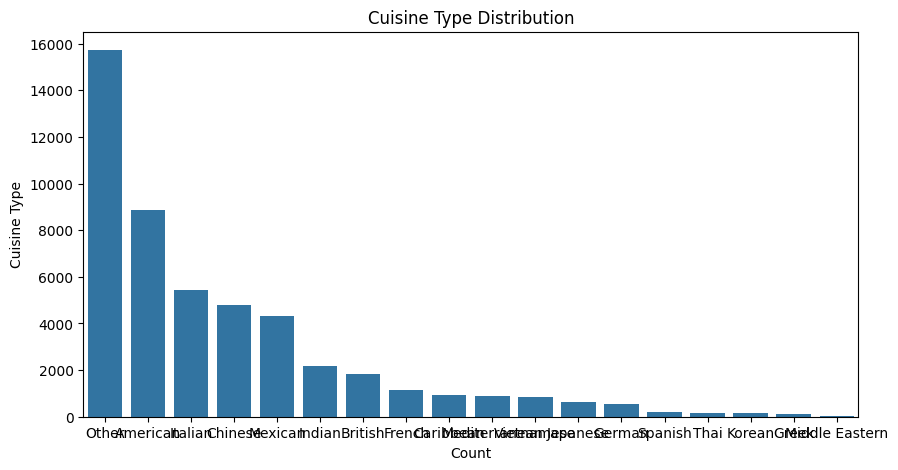

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='cuisine_type', order=df['cuisine_type'].value_counts().index)
plt.title("Cuisine Type Distribution")
plt.xlabel("Count")
plt.ylabel("Cuisine Type")
plt.show()


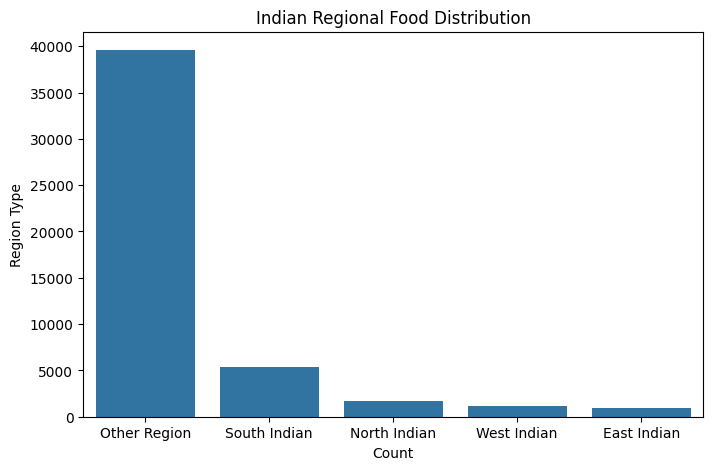

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='region_type', order=df['region_type'].value_counts().index)
plt.title("Indian Regional Food Distribution")
plt.xlabel("Count")
plt.ylabel("Region Type")
plt.show()


/tmp/ipython-input-35401784.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='veg_nonveg', palette='Set1')


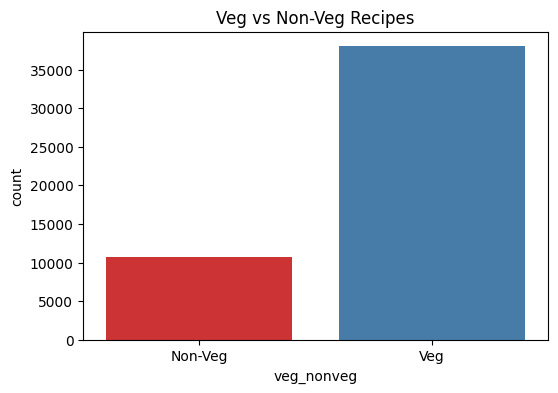

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='veg_nonveg', palette='Set1')
plt.title("Veg vs Non-Veg Recipes")
plt.show()


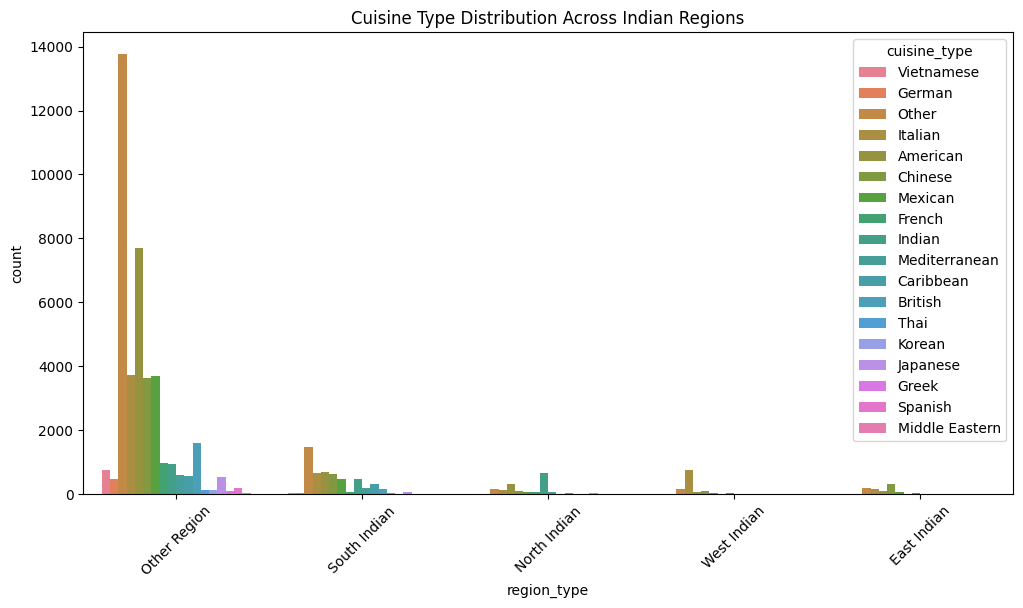

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='region_type', hue='cuisine_type')
plt.title("Cuisine Type Distribution Across Indian Regions")
plt.xticks(rotation=45)
plt.show()


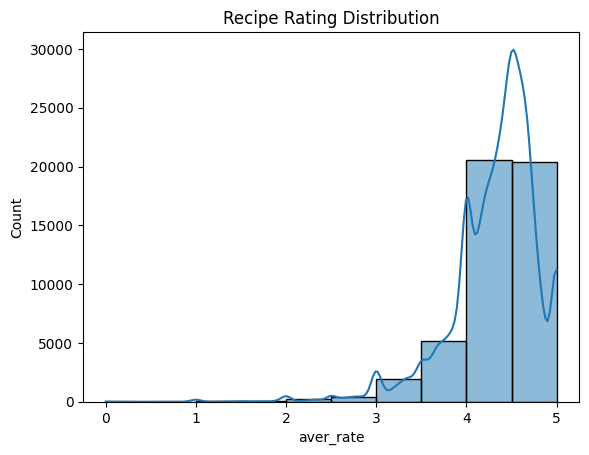

cuisine_type
Mexican           4.380121
Spanish           4.355438
Greek             4.350403
Japanese          4.346774
Mediterranean     4.344136
Vietnamese        4.323673
French            4.323236
Indian            4.320295
Italian           4.318387
Other             4.312510
Chinese           4.311918
German            4.283207
British           4.279381
American          4.274529
Korean            4.266770
Caribbean         4.266765
Thai              4.246910
Middle Eastern    4.184583
Name: aver_rate, dtype: float64


In [28]:
sns.histplot(df['aver_rate'], kde=True, bins=10)
plt.title("Recipe Rating Distribution")
plt.show()

top_rated = df.groupby('cuisine_type')['aver_rate'].mean().sort_values(ascending=False)
print(top_rated)


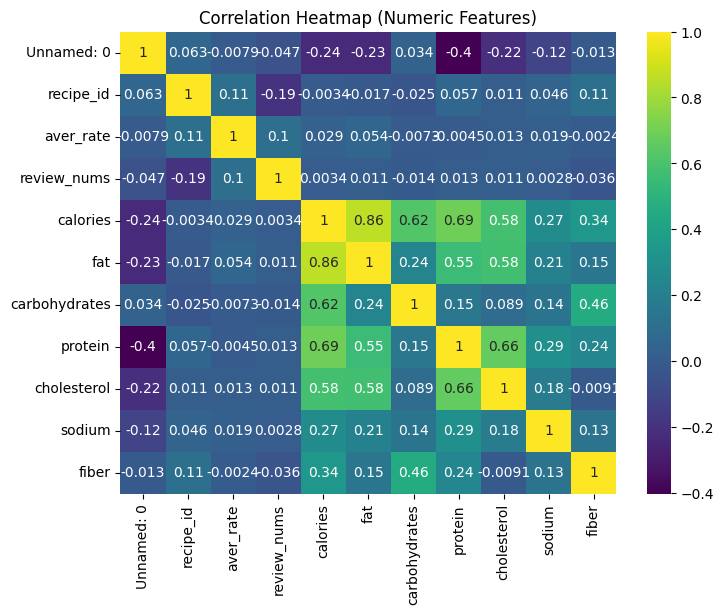

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


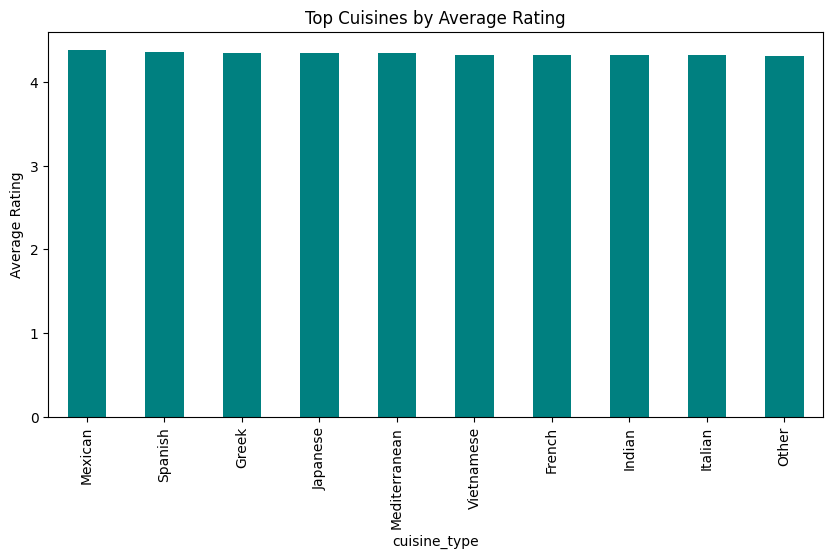

In [30]:
top_recipes = df.groupby('cuisine_type')['aver_rate'].mean().sort_values(ascending=False).head(10)
top_recipes.plot(kind='bar', figsize=(10,5), color='teal')
plt.title("Top Cuisines by Average Rating")
plt.ylabel("Average Rating")
plt.show()


In [31]:
from rapidfuzz import process
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
df['ingredients_list'] = df['ingredients_list'].astype(str)
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['ingredients_list'])

In [33]:
def recommend_food(input_value, top_n=10, by='name'):

    if by == 'name':
        all_recipes = df['recipe_name'].str.lower().tolist()
        best_match, score, _ = process.extractOne(input_value.lower(), all_recipes)
        idx = df[df['recipe_name'].str.lower() == best_match].index[0]
        print(f"Showing results similar to: {df.loc[idx,'recipe_name']} (Matched {score:.1f}%)")

    elif by == 'url':
        idx = df[df['image_url'] == input_value].index[0]
        print(f"Showing results similar to recipe with image URL: {input_value}")

    else:
        return "Invalid 'by' parameter. Choose 'name' or 'url'."

    cosine_sim = cosine_similarity(tfidf_matrix[idx], tfidf_matrix).flatten()
    similar_indices = cosine_sim.argsort()[-top_n-1:-1][::-1]

    recommendations = df.iloc[similar_indices][
        ['recipe_id', 'recipe_name','image_url','cuisine_type','region_type','veg_nonveg','aver_rate']
    ]

    return recommendations

In [34]:
def recommend_by_nutrition(calories=None, protein=None, fat=None, carbs=None, top_n=10):
    df_copy = df.copy()

    if calories is not None:
        df_copy['cal_diff'] = abs(df_copy['calories'] - calories)
    else:
        df_copy['cal_diff'] = 0

    if protein is not None:
        df_copy['prot_diff'] = abs(df_copy['protein'] - protein)
    else:
        df_copy['prot_diff'] = 0

    if fat is not None:
        df_copy['fat_diff'] = abs(df_copy['fat'] - fat)
    else:
        df_copy['fat_diff'] = 0

    if carbs is not None:
        df_copy['carb_diff'] = abs(df_copy['carbohydrates'] - carbs)
    else:
        df_copy['carb_diff'] = 0

    # Rank by closeness
    df_copy['nutrition_score'] = df_copy[['cal_diff','prot_diff','fat_diff','carb_diff']].sum(axis=1)
    best_matches = df_copy.sort_values('nutrition_score').head(top_n)

    print(" Top nutrition-based matches:")
    return best_matches[['recipe_name','calories','protein','fat','carbohydrates','cuisine_type','region_type']]

In [35]:
pairing_rules = {
    'burger': ['fries','coke','pepsi','ice cream','salad'],
    'pizza': ['garlic bread','coke','fries','ice cream'],
    'biryani': ['raita','gulab jamun','lassi','salad'],
    'pasta': ['garlic bread','juice','brownie'],
    'coffee': ['brownie','cake','cookie'],
    'tea': ['biscuit','samosa','cake'],
    'fries': ['burger','sandwich','shake'],
    'sandwich': ['fries','juice','coffee'],
    'salad': ['soup','juice','smoothie'],
    'juice': ['salad','sandwich','pasta'],
    'ice cream': ['brownie','cake','waffle']
}

def recommend_pair(food_name, top_n=5):
    """
    Recommends food pairings based on a given food name.

    Args:
        food_name (str): The name of the food to find pairings for.
        top_n (int): The number of pairings to recommend.

    Returns:
        pandas.DataFrame: A DataFrame containing the recommended food pairings.
    """
    all_recipes = df['recipe_name'].str.lower().tolist()
    best_match, score, _ = process.extractOne(food_name.lower(), all_recipes)
    text = best_match.lower()

    possible_pairs = []
    for k,v in pairing_rules.items():
        if k in text:
            possible_pairs.extend(v)
    if not possible_pairs:
        cuisine = df.loc[df['recipe_name'].str.lower()==best_match,'cuisine_type'].values[0]
        possible_pairs = df[df['cuisine_type']==cuisine]['recipe_name'].sample(min(top_n,5)).tolist() # Added parentheses here
    df_pairs = df[df['recipe_name'].str.lower().isin(possible_pairs)]
    if df_pairs.empty:
        df_pairs = df.sample(top_n)

    print(f"Suggested pairings for: {df.loc[df['recipe_name'].str.lower()==best_match,'recipe_name'].values[0]} (Match {score:.1f}%)")
    return df_pairs[['recipe_name','cuisine_type','region_type','veg_nonveg','aver_rate', 'image_url']]

In [36]:
from fastapi import FastAPI, Query
from typing import Optional, List

app = FastAPI()

In [37]:
%pip install fastapi uvicorn

In [38]:
nonveg_keywords = ['chicken', 'mutton', 'egg', 'fish', 'pork', 'beef', 'bacon', 'meat', 'turkey', 'lamb', 'shrimp']

def get_veg_nonveg(name, ingredients):
    text = str(name).lower() + " " + str(ingredients).lower()
    if any(word in text for word in nonveg_keywords):
        return "Non-Veg"
    return "Veg"

df['veg_nonveg'] = df.apply(lambda x: get_veg_nonveg(x['recipe_name'], x['ingredients_list'])
                            if 'ingredients_list' in df.columns else get_veg_nonveg(x['recipe_name'], ''), axis=1)

In [39]:
from rapidfuzz import fuzz, process

cuisine_keywords = {
    'Indian': [
        'paneer', 'masala', 'tandoori', 'dal', 'biryani', 'ghee', 'curry',
        'roti', 'paratha', 'sambar', 'chutney', 'pakora', 'korma',
        'makhani', 'pulao', 'butter chicken', 'rajma', 'poha', 'idli',
        'dosa', 'upma', 'sabzi', 'tikka', 'chapati', 'kofta', 'rasam',
        'pulav', 'bhaji', 'samosa', 'chole', 'jeera', 'kadai', 'pav bhaji',
        'malai', 'matar', 'veg curry', 'veg biryani', 'kheer', 'halwa'
    ],

    'Chinese': [
        'noodle', 'fried rice', 'manchurian', 'chilli', 'schezwan',
        'spring roll', 'soy sauce', 'hakka', 'dimsum', 'momo', 'stir fry',
        'chowmein', 'hot and sour', 'sweet and sour', 'kung pao',
        'sesame', 'ginger', 'garlic', 'rice bowl', 'soup'
    ],

    'Italian': [
        'pizza', 'pasta', 'spaghetti', 'lasagna', 'mozzarella', 'basil',
        'alfredo', 'marinara', 'risotto', 'bruschetta', 'gnocchi',
        'fettuccine', 'carbonara', 'penne', 'parmesan', 'caprese',
        'garlic bread', 'ravioli', 'macaroni', 'cheese'
    ],

    'Mexican': [
        'taco', 'burrito', 'nacho', 'quesadilla', 'salsa', 'tortilla',
        'guacamole', 'fajita', 'enchilada', 'churro', 'avocado',
        'bean dip', 'refried beans', 'mexican rice', 'jalapeno', 'chipotle'
    ],

    'American': [
        'burger', 'fries', 'sandwich', 'hotdog', 'barbecue', 'bbq',
        'steak', 'pancake', 'waffle', 'apple pie', 'brownie', 'cupcake',
        'donut', 'fried chicken', 'coleslaw', 'grilled cheese',
        'cornbread', 'mac and cheese', 'buffalo wings', 'meatloaf',
        'sloppy joe', 'pot roast', 'chili', 'biscuits', 'hashbrown',
        'pumpkin pie', 'cookies', 'muffin'
    ],

    'French': [
        'croissant', 'souffle', 'baguette', 'crepe', 'ratatouille',
        'quiche', 'french toast', 'mousse', 'crème brûlée', 'macaron',
        'éclair', 'brioche', 'au gratin', 'bechamel', 'coq au vin',
        'bouillabaisse', 'tart', 'omelette'
    ],
    'Japanese': [
        'sushi', 'ramen', 'tempura', 'miso', 'teriyaki', 'udon', 'sashimi',
        'yakitori', 'katsu', 'matcha', 'nori', 'donburi', 'shoyu', 'tamago'
    ],

    'Thai': [
        'pad thai', 'green curry', 'red curry', 'tom yum', 'lemongrass',
        'sticky rice', 'basil', 'satay', 'peanut sauce', 'thai rice'
    ],

    'Korean': [
        'kimchi', 'bulgogi', 'bibimbap', 'gochujang', 'japchae', 'kimbap',
        'soju', 'galbi', 'mandu', 'pajeon', 'dakgalbi', 'tteokbokki'
    ],

    'Mediterranean': [
        'hummus', 'falafel', 'shawarma', 'pita', 'tzatziki', 'tabbouleh',
        'feta', 'olives', 'baba ganoush', 'kebab', 'wrap', 'grilled chicken'
    ],

    'Greek': [
        'gyro', 'souvlaki', 'moussaka', 'baklava', 'spanakopita', 'feta',
        'pita', 'olive oil', 'tzatziki', 'greek salad'
    ],

    'Spanish': [
        'paella', 'tapas', 'gazpacho', 'empanada', 'churros', 'tortilla',
        'sangria', 'flan', 'croquetas'
    ],

    'Middle Eastern': [
        'shawarma', 'falafel', 'kebab', 'tabbouleh', 'hummus', 'pita',
        'tahini', 'baklava', 'manakeesh', 'knafeh'
    ],

    'Vietnamese': [
        'pho', 'banh mi', 'spring roll', 'lemongrass', 'fish sauce',
        'rice noodle', 'vermicelli', 'bun cha'
    ],

    'Caribbean': [
        'jerk chicken', 'plantain', 'coconut rice', 'curry goat',
        'ackee', 'saltfish', 'rum cake', 'patties'
    ],

    'British': [
        'fish and chips', 'shepherd’s pie', 'roast beef', 'pudding',
        'tea', 'crumpet', 'scone', 'custard'
    ],

    'German': [
        'bratwurst', 'pretzel', 'sauerkraut', 'schnitzel', 'spaetzle',
        'apple strudel', 'beer'
    ]
}

def detect_cuisine_fuzzy(name, ingredients, threshold=80):
    text = str(name).lower() + " " + str(ingredients).lower()

    best_match = None
    best_score = 0

    for cuisine, keywords in cuisine_keywords.items():
        for word in keywords:
            score = fuzz.partial_ratio(word, text)  # partial fuzzy match
            if score > best_score:
                best_match = cuisine
                best_score = score

    if best_score >= threshold:
        return best_match
    else:
        return 'Other'

df['cuisine_type'] = df.apply(
    lambda x: detect_cuisine_fuzzy(
        x['recipe_name'],
        x['ingredients_list'] if 'ingredients_list' in df.columns else ''
    ),
    axis=1
)

In [40]:
region_keywords = {
    'North Indian': [
        'paneer', 'biryani', 'butter chicken', 'dal makhani', 'roti', 'naan', 'paratha',
        'chole', 'rajma', 'saag', 'aloo gobi', 'kofta', 'korma', 'kadhi', 'pulao', 'lachha paratha',
        'tandoori', 'kebab', 'bhature', 'samosa', 'chaat', 'kachori', 'gajar halwa', 'malai kofta',
        'stuffed paratha', 'mutter paneer', 'shahi paneer', 'chicken tikka', 'palak paneer',
        'dal tadka', 'methi malai matar', 'jeera rice', 'butter naan', 'veg kolhapuri',
        'rogan josh', 'chicken curry', 'veg jalfrezi', 'paneer butter masala'
    ],

    'South Indian': [
        'dosa', 'idli', 'vada', 'sambar', 'rasam', 'uttapam', 'pongal', 'upma', 'appam', 'puttu',
        'lemon rice', 'curd rice', 'tamarind rice', 'coconut chutney', 'chettinad', 'fish curry',
        'chicken 65', 'kootu', 'avial', 'malabar', 'meen curry', 'mutton curry', 'vegetable stew',
        'kappa', 'payasam', 'banana chips', 'idiyappam', 'prawn curry', 'pesarattu', 'rice idli',
        'onion dosa', 'masala dosa', 'ragi dosa', 'neer dosa', 'set dosa'
    ],

    'East Indian': [
        'machher jhol', 'chingri malai curry', 'rosogolla', 'rasgulla', 'sandesh', 'litti chokha',
        'sattu paratha', 'aloo posto', 'dalma', 'pakhala', 'ghugni', 'chhena poda', 'pithe',
        'posto', 'beguni', 'fish curry', 'vegetable chop', 'mishti doi', 'cholar dal',
        'prawn malai curry', 'pakhala bhata', 'momo', 'thukpa', 'veg chowmein'
    ],

    'West Indian': [
        'dhokla', 'thepla', 'undhiyu', 'sev tameta', 'vada pav', 'pav bhaji', 'misal pav', 'poha',
        'shrikhanda', 'khandvi', 'modak', 'fish curry', 'sol kadhi', 'goan prawn curry',
        'batata vada', 'sabudana khichdi', 'besan ladoo', 'jalebi', 'bhakri', 'handvo',
        'patra', 'sheera', 'bombay sandwich', 'veg kolhapuri', 'masala pav', 'bhel puri', 'sev puri'
    ]
}

def detect_region_rapid(name, ingredients, threshold=80):

    text = (str(name) + " " + str(ingredients)).lower()

    best_match = None
    best_score = 0

    for region, keywords in region_keywords.items():
        for word in keywords:
            score = fuzz.partial_ratio(word, text)
            if score > best_score:
                best_match = region
                best_score = score

    if best_score >= threshold:
        return best_match
    else:
        return 'Other Region'

df['region_type'] = df.apply(
    lambda x: detect_region_rapid(
        x['recipe_name'],
        x['ingredients_list'] if 'ingredients_list' in df.columns else ''
    ),
    axis=1
)

In [41]:
# Load and prepare data
try:
    df = pd.read_csv("recipe_final (1) (1).csv")
    df['ingredients_list'] = df['ingredients_list'].astype(str)
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(df['ingredients_list'])
    print("Data loaded and preprocessed successfully.")
    print("Shape:", df.shape)


except FileNotFoundError:
    print("Error: The file 'recipe_final (1) (1).csv' was not found. Please make sure the file is in the correct directory.")
except Exception as e:
    print(f"An error occurred during data loading and preprocessing: {e}")

Data loaded and preprocessed successfully.
Shape: (48735, 14)


In [42]:
# Feature Engineering: Veg/Non-Veg Classification
nonveg_keywords = ['chicken', 'mutton', 'egg', 'fish', 'pork', 'beef', 'bacon', 'meat', 'turkey', 'lamb', 'shrimp']

def get_veg_nonveg(name, ingredients):
    text = str(name).lower() + " " + str(ingredients).lower()
    if any(word in text for word in nonveg_keywords):
        return "Non-Veg"
    return "Veg"

df['veg_nonveg'] = df.apply(lambda x: get_veg_nonveg(x['recipe_name'], x['ingredients_list'])
                            if 'ingredients_list' in df.columns else get_veg_nonveg(x['recipe_name'], ''), axis=1)

print("'veg_nonveg' column created.")

'veg_nonveg' column created.


In [43]:
# Feature Engineering: Cuisine Type Detection
cuisine_keywords = {
    'Indian': [
        'paneer', 'masala', 'tandoori', 'dal', 'biryani', 'ghee', 'curry',
        'roti', 'paratha', 'sambar', 'chutney', 'pakora', 'korma',
        'makhani', 'pulao', 'butter chicken', 'rajma', 'poha', 'idli',
        'dosa', 'upma', 'sabzi', 'tikka', 'chapati', 'kofta', 'rasam',
        'pulav', 'bhaji', 'samosa', 'chole', 'jeera', 'kadai', 'pav bhaji',
        'malai', 'matar', 'veg curry', 'veg biryani', 'kheer', 'halwa'
    ],

    'Chinese': [
        'noodle', 'fried rice', 'manchurian', 'chilli', 'schezwan',
        'spring roll', 'soy sauce', 'hakka', 'dimsum', 'momo', 'stir fry',
        'chowmein', 'hot and sour', 'sweet and sour', 'kung pao',
        'sesame', 'ginger', 'garlic', 'rice bowl', 'soup'
    ],

    'Italian': [
        'pizza', 'pasta', 'spaghetti', 'lasagna', 'mozzarella', 'basil',
        'alfredo', 'marinara', 'risotto', 'bruschetta', 'gnocchi',
        'fettuccine', 'carbonara', 'penne', 'parmesan', 'caprese',
        'garlic bread', 'ravioli', 'macaroni', 'cheese'
    ],

    'Mexican': [
        'taco', 'burrito', 'nacho', 'quesadilla', 'salsa', 'tortilla',
        'guacamole', 'fajita', 'enchilada', 'churro', 'avocado',
        'bean dip', 'refried beans', 'mexican rice', 'jalapeno', 'chipotle'
    ],

    'American': [
        'burger', 'fries', 'sandwich', 'hotdog', 'barbecue', 'bbq',
        'steak', 'pancake', 'waffle', 'apple pie', 'brownie', 'cupcake',
        'donut', 'fried chicken', 'coleslaw', 'grilled cheese',
        'cornbread', 'mac and cheese', 'buffalo wings', 'meatloaf',
        'sloppy joe', 'pot roast', 'chili', 'biscuits', 'hashbrown',
        'pumpkin pie', 'cookies', 'muffin'
    ],

    'French': [
        'croissant', 'souffle', 'baguette', 'crepe', 'ratatouille',
        'quiche', 'french toast', 'mousse', 'crème brûlée', 'macaron',
        'éclair', 'brioche', 'au gratin', 'bechamel', 'coq au vin',
        'bouillabaisse', 'tart', 'omelette'
    ],
    'Japanese': [
        'sushi', 'ramen', 'tempura', 'miso', 'teriyaki', 'udon', 'sashimi',
        'yakitori', 'katsu', 'matcha', 'nori', 'donburi', 'shoyu', 'tamago'
    ],

    'Thai': [
        'pad thai', 'green curry', 'red curry', 'tom yum', 'lemongrass',
        'sticky rice', 'basil', 'satay', 'peanut sauce', 'thai rice'
    ],

    'Korean': [
        'kimchi', 'bulgogi', 'bibimbap', 'gochujang', 'japchae', 'kimbap',
        'soju', 'galbi', 'mandu', 'pajeon', 'dakgalbi', 'tteokbokki'
    ],

    'Mediterranean': [
        'hummus', 'falafel', 'shawarma', 'pita', 'tzatziki', 'tabbouleh',
        'feta', 'olives', 'baba ganoush', 'kebab', 'wrap', 'grilled chicken'
    ],

    'Greek': [
        'gyro', 'souvlaki', 'moussaka', 'baklava', 'spanakopita', 'feta',
        'pita', 'olive oil', 'tzatziki', 'greek salad'
    ],

    'Spanish': [
        'paella', 'tapas', 'gazpacho', 'empanada', 'churros', 'tortilla',
        'sangria', 'flan', 'croquetas'
    ],

    'Middle Eastern': [
        'shawarma', 'falafel', 'kebab', 'tabbouleh', 'hummus', 'pita',
        'tahini', 'baklava', 'manakeesh', 'knafeh'
    ],

    'Vietnamese': [
        'pho', 'banh mi', 'spring roll', 'lemongrass', 'fish sauce',
        'rice noodle', 'vermicelli', 'bun cha'
    ],

    'Caribbean': [
        'jerk chicken', 'plantain', 'coconut rice', 'curry goat',
        'ackee', 'saltfish', 'rum cake', 'patties'
    ],

    'British': [
        'fish and chips', 'shepherd’s pie', 'roast beef', 'pudding',
        'tea', 'crumpet', 'scone', 'custard'
    ],

    'German': [
        'bratwurst', 'pretzel', 'sauerkraut', 'schnitzel', 'spaetzle',
        'apple strudel', 'beer'
    ]
}

def detect_cuisine_fuzzy(name, ingredients, threshold=80):
    text = str(name).lower() + " " + str(ingredients).lower()

    best_match = None
    best_score = 0

    for cuisine, keywords in cuisine_keywords.items():
        for word in keywords:
            score = fuzz.partial_ratio(word, text)  # partial fuzzy match
            if score > best_score:
                best_match = cuisine
                best_score = score

    if best_score >= threshold:
        return best_match
    else:
        return 'Other'

df['cuisine_type'] = df.apply(
    lambda x: detect_cuisine_fuzzy(
        x['recipe_name'],
        x['ingredients_list'] if 'ingredients_list' in df.columns else ''
    ),
    axis=1
)

print("'cuisine_type' column created.")

'cuisine_type' column created.


In [44]:
# Feature Engineering: Indian Regional Food Detection
region_keywords = {
    'North Indian': [
        'paneer', 'biryani', 'butter chicken', 'dal makhani', 'roti', 'naan', 'paratha',
        'chole', 'rajma', 'saag', 'aloo gobi', 'kofta', 'korma', 'kadhi', 'pulao', 'lachha paratha',
        'tandoori', 'kebab', 'bhature', 'samosa', 'chaat', 'kachori', 'gajar halwa', 'malai kofta',
        'stuffed paratha', 'mutter paneer', 'shahi paneer', 'chicken tikka', 'palak paneer',
        'dal tadka', 'methi malai matar', 'jeera rice', 'butter naan', 'veg kolhapuri',
        'rogan josh', 'chicken curry', 'veg jalfrezi', 'paneer butter masala'
    ],

    'South Indian': [
        'dosa', 'idli', 'vada', 'sambar', 'rasam', 'uttapam', 'pongal', 'upma', 'appam', 'puttu',
        'lemon rice', 'curd rice', 'tamarind rice', 'coconut chutney', 'chettinad', 'fish curry',
        'chicken 65', 'kootu', 'avial', 'malabar', 'meen curry', 'mutton curry', 'vegetable stew',
        'kappa', 'payasam', 'banana chips', 'idiyappam', 'prawn curry', 'pesarattu', 'rice idli',
        'onion dosa', 'masala dosa', 'ragi dosa', 'neer dosa', 'set dosa'
    ],

    'East Indian': [
        'machher jhol', 'chingri malai curry', 'rosogolla', 'rasgulla', 'sandesh', 'litti chokha',
        'sattu paratha', 'aloo posto', 'dalma', 'pakhala', 'ghugni', 'chhena poda', 'pithe',
        'posto', 'beguni', 'fish curry', 'vegetable chop', 'mishti doi', 'cholar dal',
        'prawn malai curry', 'pakhala bhata', 'momo', 'thukpa', 'veg chowmein'
    ],

    'West Indian': [
        'dhokla', 'thepla', 'undhiyu', 'sev tameta', 'vada pav', 'pav bhaji', 'misal pav', 'poha',
        'shrikhanda', 'khandvi', 'modak', 'fish curry', 'sol kadhi', 'goan prawn curry',
        'batata vada', 'sabudana khichdi', 'besan ladoo', 'jalebi', 'bhakri', 'handvo',
        'patra', 'sheera', 'bombay sandwich', 'veg kolhapuri', 'masala pav', 'bhel puri', 'sev puri'
    ]
}

def detect_region_rapid(name, ingredients, threshold=80):

    text = (str(name) + " " + str(ingredients)).lower()

    best_match = None
    best_score = 0

    for region, keywords in region_keywords.items():
        for word in keywords:
            score = fuzz.partial_ratio(word, text)
            if score > best_score:
                best_match = region
                best_score = score

    if best_score >= threshold:
        return best_match
    else:
        return 'Other Region'

df['region_type'] = df.apply(
    lambda x: detect_region_rapid(
        x['recipe_name'],
        x['ingredients_list'] if 'ingredients_list' in df.columns else ''
    ),
    axis=1
)

print("'region_type' column created.")

'region_type' column created.


In [45]:
# Recommendation Function 1: By Recipe Name or URL
def recommend_food(input_value, top_n=10, by='name'):

    if by == 'name':
        all_recipes = df['recipe_name'].str.lower().tolist()
        best_match, score, _ = process.extractOne(input_value.lower(), all_recipes)
        idx = df[df['recipe_name'].str.lower() == best_match].index[0]
        print(f"Showing results similar to: {df.loc[idx,'recipe_name']} (Matched {score:.1f}%)")

    elif by == 'url':
        idx = df[df['image_url'] == input_value].index[0]
        print(f"Showing results similar to recipe with image URL: {input_value}")

    else:
        print("Invalid 'by' parameter. Choose 'name' or 'url'.")
        return pd.DataFrame() # Return empty DataFrame for invalid input


    cosine_sim = cosine_similarity(tfidf_matrix[idx], tfidf_matrix).flatten()
    # Get the indices of the top_n similar recipes (excluding the input recipe itself)
    similar_indices = cosine_sim.argsort()[-top_n-1:-1][::-1]

    recommendations = df.iloc[similar_indices][
        ['recipe_id', 'recipe_name','image_url','cuisine_type','region_type','veg_nonveg','aver_rate']
    ]

    return recommendations

In [46]:
# Recommendation Function 2: By Nutrition
def recommend_by_nutrition(calories=None, protein=None, fat=None, carbs=None, top_n=10):

    df_copy = df.copy()

    if calories is not None:
        df_copy['cal_diff'] = abs(df_copy['calories'] - calories)
    else:
        df_copy['cal_diff'] = 0

    if protein is not None:
        df_copy['prot_diff'] = abs(df_copy['protein'] - protein)
    else:
        df_copy['prot_diff'] = 0

    if fat is not None:
        df_copy['fat_diff'] = abs(df_copy['fat'] - fat)
    else:
        df_copy['fat_diff'] = 0

    if carbs is not None:
        df_copy['carb_diff'] = abs(df_copy['carbohydrates'] - carbs)
    else:
        df_copy['carb_diff'] = 0

    # Rank by closeness
    df_copy['nutrition_score'] = df_copy[['cal_diff','prot_diff','fat_diff','carb_diff']].sum(axis=1)
    best_matches = df_copy.sort_values('nutrition_score').head(top_n)

    print("Top nutrition-based matches:")
    return best_matches[['recipe_name','calories','protein','fat','carbohydrates','cuisine_type','region_type', 'image_url']]

In [47]:
# Recommendation Function 3: Food Pairing
pairing_rules = {
    'burger': ['fries','coke','pepsi','ice cream','salad'],
    'pizza': ['garlic bread','coke','fries','ice cream'],
    'biryani': ['raita','gulab jamun','lassi','salad'],
    'pasta': ['garlic bread','juice','brownie'],
    'coffee': ['brownie','cake','cookie'],
    'tea': ['biscuit','samosa','cake'],
    'fries': ['burger','sandwich','shake'],
    'sandwich': ['fries','juice','coffee'],
    'salad': ['soup','juice','smoothie'],
    'juice': ['salad','sandwich','pasta'],
    'ice cream': ['brownie','cake','waffle']
}

def recommend_pair(food_name, top_n=5):

    all_recipes = df['recipe_name'].str.lower().tolist()
    best_match, score, _ = process.extractOne(food_name.lower(), all_recipes)
    text = best_match.lower()

    possible_pairs = []
    for k,v in pairing_rules.items():
        if k in text:
            possible_pairs.extend(v)
    if not possible_pairs:
        cuisine = df.loc[df['recipe_name'].str.lower()==best_match,'cuisine_type'].values[0]
        possible_pairs = df[df['cuisine_type']==cuisine]['recipe_name'].sample(min(top_n,5)).tolist() # Added parentheses here
    df_pairs = df[df['recipe_name'].str.lower().isin(possible_pairs)]
    if df_pairs.empty:
        df_pairs = df.sample(top_n)

    print(f"Suggested pairings for: {df.loc[df['recipe_name'].str.lower()==best_match,'recipe_name'].values[0]} (Match {score:.1f}%)")
    return df_pairs[['recipe_name','cuisine_type','region_type','veg_nonveg','aver_rate', 'image_url']]

In [48]:
# Define FastAPI app instance
app = FastAPI()

In [49]:
from fastapi import FastAPI, Query
from typing import Optional, List
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from rapidfuzz import fuzz, process
from sklearn.metrics.pairwise import cosine_similarity
import uvicorn # Import uvicorn

# Define FastAPI app instance
app = FastAPI()

# Define API endpoints
@app.get("/recommend_by_name")
def recommend_by_name_endpoint(food_name: str):

    recommendations = recommend_food(food_name, by='name')
    if isinstance(recommendations, pd.DataFrame):
        return recommendations.to_dict(orient='records')
    else:
        # Handle the case where recommend_food returns an error message (string)
        return {"detail": recommendations}


@app.get("/recommend_by_url")
def recommend_by_url_endpoint(image_url: str):

    recommendations = recommend_food(image_url, by='url')
    if isinstance(recommendations, pd.DataFrame):
        return recommendations.to_dict(orient='records')
    else:
         # Handle the case where recommend_food returns an error message (string)
        return {"detail": recommendations}


@app.get("/recommend_by_nutrition")
def recommend_by_nutrition_endpoint(
    calories: Optional[int] = Query(None),
    protein: Optional[int] = Query(None),
    fat: Optional[int] = Query(None),
    carbs: Optional[int] = Query(None)
):

    recommendations = recommend_by_nutrition(calories=calories, protein=protein, fat=fat, carbs=carbs)
    return recommendations.to_dict(orient='records')


@app.get("/recommend_pair")
def recommend_pair_endpoint(food_name: str):

    recommendations = recommend_pair(food_name)
    return recommendations.to_dict(orient='records')

# Add this block to run the app locally
if __name__ == "__main__":
    # To run this in VS Code, save this as a .py file (e.g., main.py)
    # and run 'uvicorn main:app --reload' in your terminal within the same directory.
    # Make sure you have uvicorn installed ('pip install uvicorn').
    uvicorn.run(app, host="0.0.0.0", port=8000)

RuntimeError: asyncio.run() cannot be called from a running event loop

In [ ]:
!pip install rapidfuzz